In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('bankloan.csv')
df


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [122]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Desbalance de los datos

## Al visualizar los datos que se tienen, estos demuestran un desbalance de mas de 4000 personas que no tienen un prestamo personal y solamente 480 si lo tienen

<Axes: xlabel='Personal.Loan'>

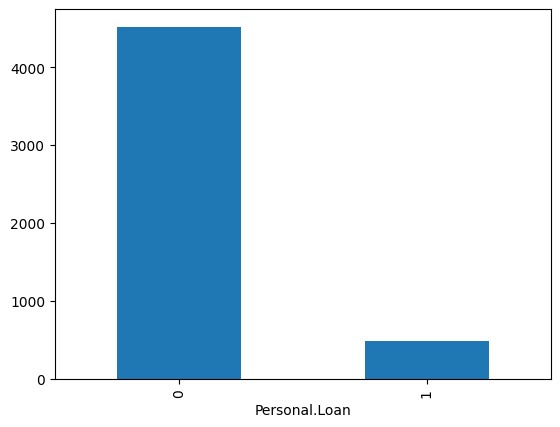

In [124]:
df['Personal.Loan'].value_counts().plot(kind='bar')

<Axes: xlabel='CreditCard', ylabel='Income'>

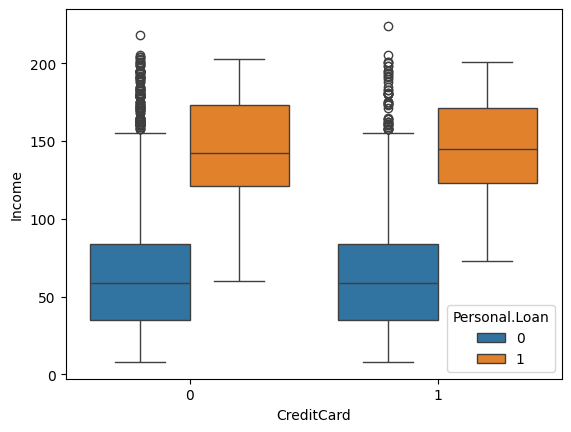

In [125]:
sns.boxplot(df, x= 'CreditCard',y = 'Income',hue ='Personal.Loan')

In [126]:
df_30 = df[df['Age'] <= 30]
df_30.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
11,12,29,5,45,90277,3,0.1,2,0,0,0,0,1,0
22,23,29,5,62,90277,1,1.2,1,260,0,0,0,1,0
33,34,30,6,18,91330,3,0.9,3,0,0,0,0,0,0
52,53,30,6,72,94005,1,0.1,1,207,0,0,0,0,0


<Axes: xlabel='CreditCard', ylabel='Income'>

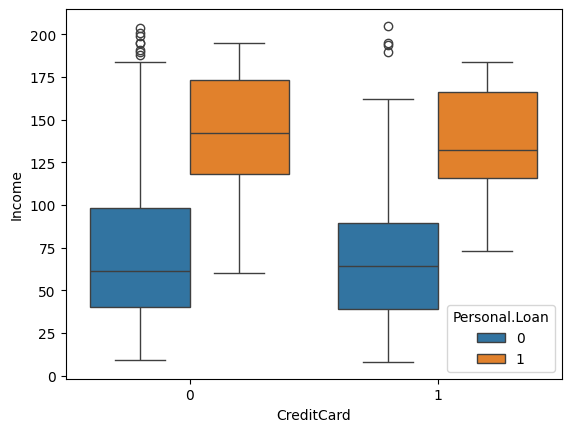

In [127]:
sns.boxplot(df_30, x= 'CreditCard',y = 'Income',hue ='Personal.Loan')

<Axes: xlabel='Income', ylabel='Density'>

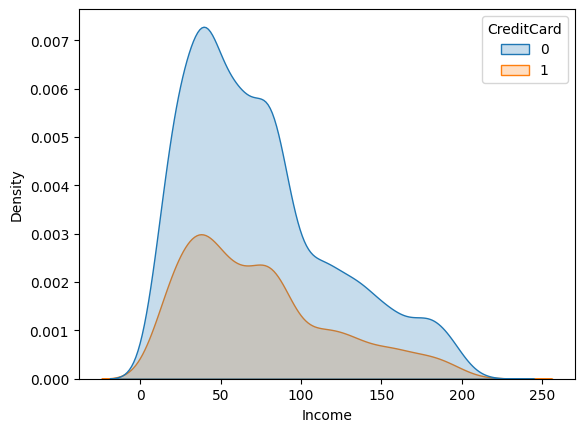

In [128]:
sns.kdeplot(df, x ='Income',hue='CreditCard',fill=True)

<Axes: xlabel='Mortgage', ylabel='Density'>

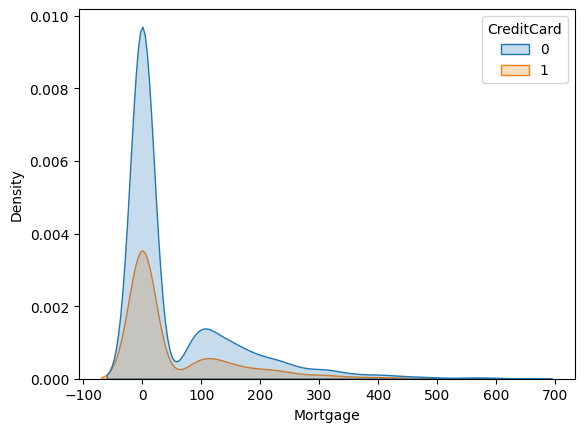

In [129]:
sns.kdeplot(df, x ='Mortgage',hue='CreditCard',fill=True)

In [130]:
df.drop(['ID'],axis=1,inplace=True)
df.drop(['ZIP.Code'],axis=1,inplace=True)

df


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


<Axes: xlabel='Personal.Loan'>

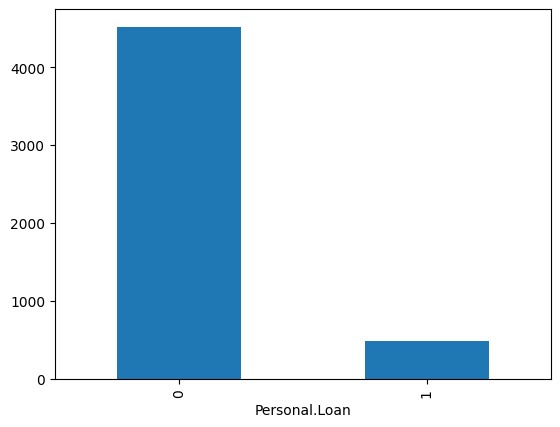

In [131]:
df['Personal.Loan'].value_counts().plot(kind='bar')

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import numpy as np

In [133]:
X = df.drop('Personal.Loan',axis=1)
y =df['Personal.Loan']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.60,random_state=101)


In [135]:
numerical_features = X.select_dtypes(include=['int64','float64'])
categorical_features = X.select_dtypes(exclude=['int64','float64'])

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first') #drops the column 

In [136]:
from xgboost import XGBClassifier 

preprocesador = ColumnTransformer(
    transformers = [
        ("num",numerical_transformer,numerical_features.columns),
        ('cat',categorical_transformer,categorical_features.columns)
    ]
)

model = Pipeline(
    steps =[
        ('preprocessor',preprocesador),
        ('rf',XGBClassifier(n_estimators =200,learning_rate = 0.01))
    ]
)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)




In [137]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1808
           1       0.95      0.86      0.90       192

    accuracy                           0.98      2000
   macro avg       0.97      0.93      0.95      2000
weighted avg       0.98      0.98      0.98      2000



<Axes: >

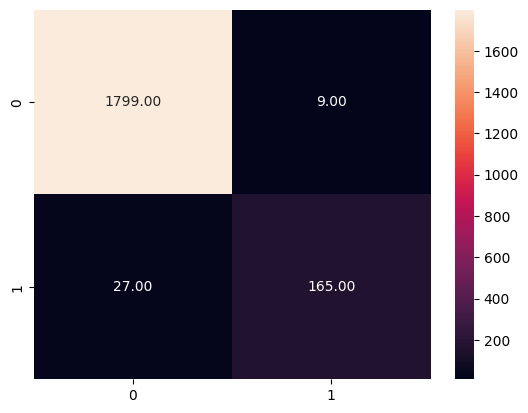

In [138]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

# Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier 
preprocesador = ColumnTransformer(
    transformers = [
        ("num",numerical_transformer,numerical_features.columns),
        ('cat',categorical_transformer,categorical_features.columns)
    ]
)

model = Pipeline(
    steps =[
        ('preprocessor',preprocesador),
        ('rf',RandomForestClassifier(n_estimators=200)) #n_estimators = numero de arboles; max_depth= maximo nivel de profundidad
    ]
)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1808
           1       0.95      0.89      0.92       192

    accuracy                           0.98      2000
   macro avg       0.97      0.94      0.95      2000
weighted avg       0.98      0.98      0.98      2000



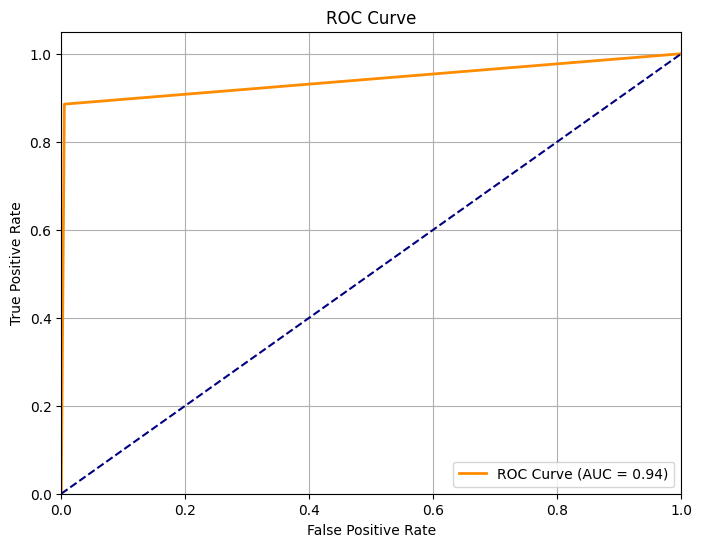

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

fpr, tpr,_ = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,
         color ='darkorange',
         lw=2,
         label = f"ROC Curve (AUC = {roc_auc:.2f})"
         )

plt.plot([0,1],[0,1], color ='navy', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




# Feature Importance

In [142]:
feature_names = np.array(model.named_steps['preprocessor'].get_feature_names_out())
feature_names

array(['num__Age', 'num__Experience', 'num__Income', 'num__Family',
       'num__CCAvg', 'num__Education', 'num__Mortgage',
       'num__Securities.Account', 'num__CD.Account', 'num__Online',
       'num__CreditCard'], dtype=object)

In [143]:
feature_importances = model.named_steps['rf'].feature_importances_
feature_importances

array([0.03725169, 0.03408888, 0.34163824, 0.10331035, 0.17362404,
       0.19048761, 0.04490153, 0.0046281 , 0.0543419 , 0.00808534,
       0.00764233])

In [144]:
datos = {
    'feature': feature_names,
    'importance': feature_importances
}
importance_df = pd.DataFrame(datos)
importance_df.sort_values(by='importance', ascending=False,inplace=True)
importance_df

,feature,importance
2,num__Income,0.341638
5,num__Education,0.190488
4,num__CCAvg,0.173624
3,num__Family,0.103310
8,num__CD.Account,0.054342
6,num__Mortgage,0.044902
0,num__Age,0.037252
1,num__Experience,0.034089
9,num__Online,0.008085
10,num__CreditCard,0.007642


# Balancing Data for further purposes

In [145]:
df_majority = df[df['Personal.Loan'] == 0]
df_minority = df[df['Personal.Loan'] == 1]

df_majority_downsampled = df_majority.sample(n = len(df_minority),random_state=101,replace=True)
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1,random_state=101).reset_index(drop=True)
df = df_balanced
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,51,27,22,4,0.5,2,0,0,0,0,1,1
1,61,35,152,3,3.3,3,0,1,0,0,1,0
2,49,25,109,2,6.8,1,0,0,0,0,0,0
3,47,22,81,1,2.9,1,0,0,0,0,0,1
4,57,33,43,1,1.8,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
955,41,15,185,1,3.6,2,0,1,0,0,0,0
956,32,8,169,1,6.5,3,272,1,1,1,1,0
957,58,33,25,4,0.9,2,90,0,0,0,1,1
958,58,28,122,1,3.0,3,115,1,0,0,1,0


<Axes: xlabel='Personal.Loan'>

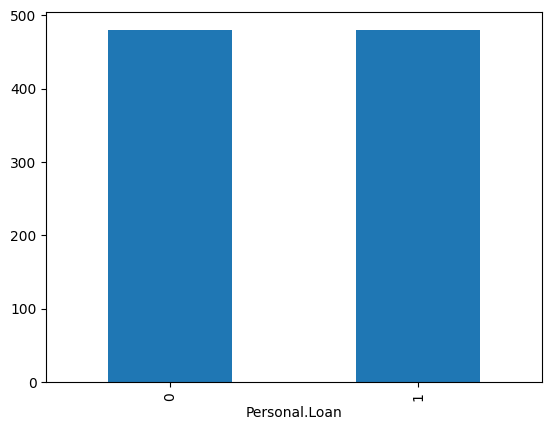

In [146]:
df['Personal.Loan'].value_counts().plot(kind='bar')

<Axes: xlabel='Education', ylabel='count'>

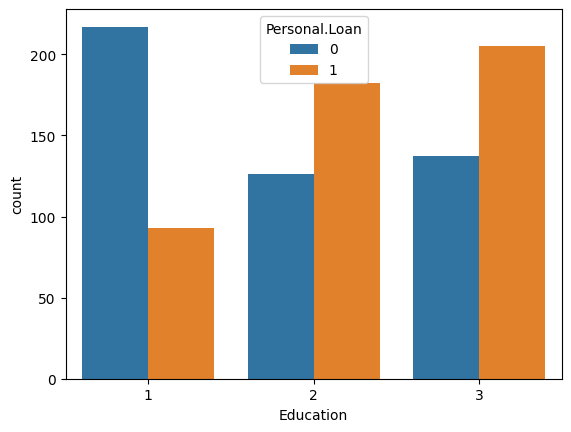

In [147]:
sns.countplot(df,x="Education",hue='Personal.Loan')

In [148]:
X = df.drop('Personal.Loan',axis=1)
y =df['Personal.Loan']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.60,random_state=101)


In [150]:
numerical_features = X.select_dtypes(include=['int64','float64'])
categorical_features = X.select_dtypes(exclude=['int64','float64'])

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first') #drops the column 

In [151]:
from xgboost import XGBClassifier 

preprocesador = ColumnTransformer(
    transformers = [
        ("num",numerical_transformer,numerical_features.columns),
        ('cat',categorical_transformer,categorical_features.columns)
    ]
)

model = Pipeline(
    steps =[
        ('preprocessor',preprocesador),
        ('rf',XGBClassifier(n_estimators =200,learning_rate = 0.01))
    ]
)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)




In [152]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       195
           1       0.98      0.96      0.97       189

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384



<Axes: >

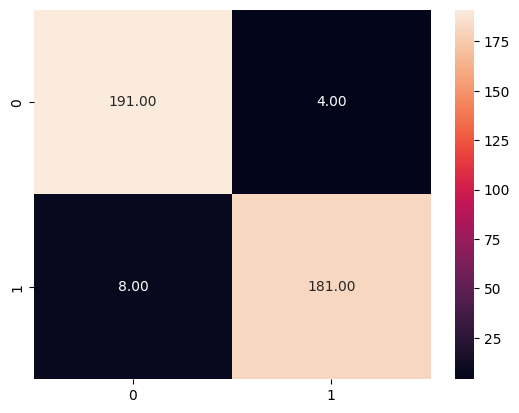

In [153]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

# Random Forest Clasiffier (Balanced)

In [154]:
from sklearn.ensemble import RandomForestClassifier 
preprocesador = ColumnTransformer(
    transformers = [
        ("num",numerical_transformer,numerical_features.columns),
        ('cat',categorical_transformer,categorical_features.columns)
    ]
)

model = Pipeline(
    steps =[
        ('preprocessor',preprocesador),
        ('rf',RandomForestClassifier(n_estimators=200)) #n_estimators = numero de arboles; max_depth= maximo nivel de profundidad
    ]
)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       195
           1       0.97      0.98      0.98       189

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



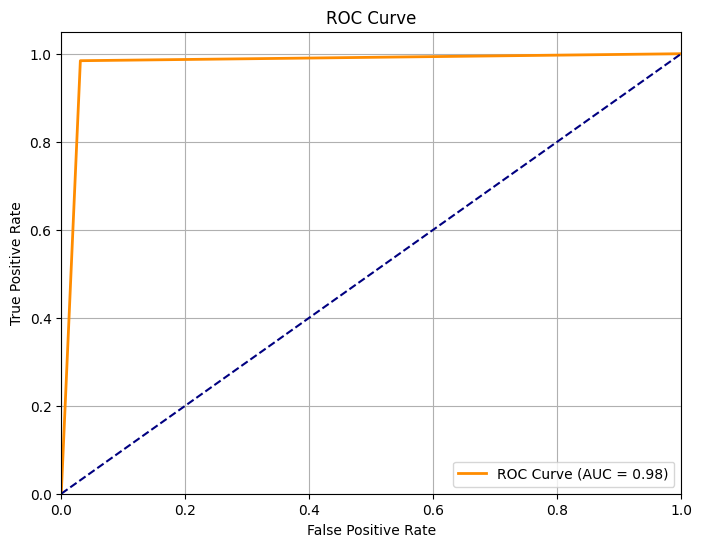

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

fpr, tpr,_ = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,
         color ='darkorange',
         lw=2,
         label = f"ROC Curve (AUC = {roc_auc:.2f})"
         )

plt.plot([0,1],[0,1], color ='navy', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




In [157]:
feature_names = np.array(model.named_steps['preprocessor'].get_feature_names_out())
feature_names

array(['num__Age', 'num__Experience', 'num__Income', 'num__Family',
       'num__CCAvg', 'num__Education', 'num__Mortgage',
       'num__Securities.Account', 'num__CD.Account', 'num__Online',
       'num__CreditCard'], dtype=object)

In [158]:
feature_importances = model.named_steps['rf'].feature_importances_
feature_importances

array([0.03632298, 0.0401245 , 0.46741681, 0.05890006, 0.21512334,
       0.08021767, 0.04090668, 0.00513561, 0.03770633, 0.00898365,
       0.00916239])

In [159]:
datos = {
    'feature': feature_names,
    'importance': feature_importances
}
importance_df = pd.DataFrame(datos)
importance_df.sort_values(by='importance', ascending=False,inplace=True)
importance_df

,feature,importance
2,num__Income,0.467417
4,num__CCAvg,0.215123
5,num__Education,0.080218
3,num__Family,0.058900
6,num__Mortgage,0.040907
1,num__Experience,0.040124
8,num__CD.Account,0.037706
0,num__Age,0.036323
10,num__CreditCard,0.009162
9,num__Online,0.008984
